# Data access
This tutorial outlines the basics of accessing the data from this data release via NDS2. To access data, make sure you have first installed `gwpy` and `python-nds2-client`. Both of these packages can be installed with `conda`. 


In [1]:
from gwpy.detector import ChannelList, Channel
from gwpy.timeseries import TimeSeries
from gwpy.time import tconvert
%matplotlib inline

## Fetch data

Let's download an example of auxiliary data that is included in this release! To do so, we need to use the function `TimeSeries.fetch()` from the `gwpy.timeseries` package. This function requires 4 inputs:

* `channel`: The channel name of the data we want to download.
* `start`: The start time of the data we want to download.
* `end`: The end time of the data we want to download.
* `server`: The name of the NDS2 server to query. In this case we will use `losc-nds.ligo.org`.

As an example, we will download data from `L1:ISI-GND_STS_ITMY_Z_BLRMS_30M_100M` on Jan 16 2020. This channel measures sesimic motion at LIGO Livingston in the frequency band 30-100 mHz. This frequency range is often referred to as the "earthquake band" as it is the frequencies at which earthquakes are most visible in seismic data.

In [2]:
t0 = tconvert('Jan 16 2020 17:00:00')
start = int(t0)
end = int(t0+3600)
server = 'losc-nds.ligo.org'  #-- GWOSC NDS2 server name

data = TimeSeries.fetch('L1:ISI-GND_STS_ITMY_Z_BLRMS_30M_100M', start=start, end=end, host=server)

## Make a plot of the data

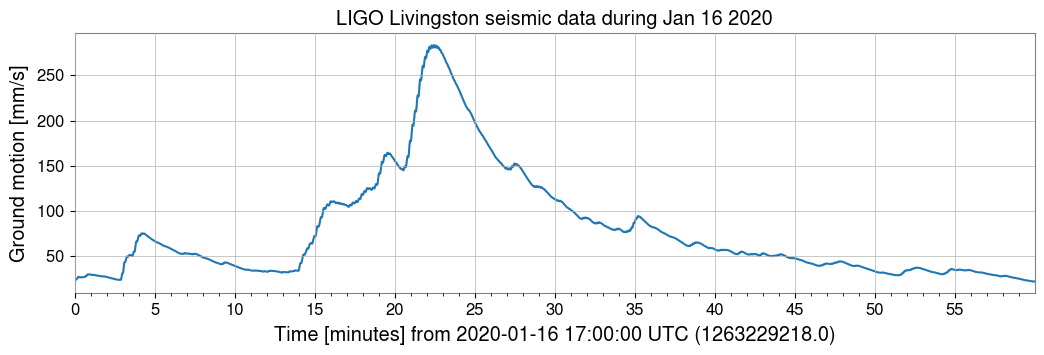

In [3]:
plot = data.plot(
    title="LIGO Livingston seismic data during Jan 16 2020",
    ylabel="Ground motion [mm/s]",
    epoch=t0,
)
plot.show()

We can see that there is a large spike in the data around 20 minutes in! This corresponds to the time of an earthquake that reported in the [LIGO Livingston logbook](https://alog.ligo-la.caltech.edu/aLOG/index.php?callRep=51003).

##  Query for all channels that are available

In [4]:
chanlist = ChannelList.query_nds2('*', host='losc-nds.ligo.org' )

print("Found {0} channels\n".format(len(chanlist)))
print("Printing first 10 channels ...")
for chan in chanlist[0:10]:
    print(chan.name, chan.sample_rate)

Found 1263 channels

Printing first 10 channels ...
H1:ASC-AS_A_DC_NSUM_OUT_DQ 2048.0 Hz
H1:ASC-CHARD_P_IN1_DQ 256.0 Hz
H1:ASC-CHARD_P_INMON 16.0 Hz
H1:ASC-CHARD_P_OUT_DQ 512.0 Hz
H1:ASC-CHARD_Y_IN1_DQ 256.0 Hz
H1:ASC-CHARD_Y_INMON 16.0 Hz
H1:ASC-CHARD_Y_OUT_DQ 512.0 Hz
H1:ASC-CSOFT_P_IN1_DQ 256.0 Hz
H1:ASC-CSOFT_P_INMON 16.0 Hz
H1:ASC-CSOFT_P_OUT_DQ 512.0 Hz


##  Filter channel list matching some condition

In [5]:
auxlist = [chan for chan in chanlist if '30M_100M' in chan.name]
print("Here are channels containing 30M_100M in the name ...")
for chan in auxlist:
    print(chan.name, chan.sample_rate)

Here are channels containing 30M_100M in the name ...
H1:ISI-GND_BRS_ETMY_RX_BLRMS_30M_100M 16.0 Hz
H1:ISI-GND_STS_ITMY_Z_BLRMS_30M_100M 16.0 Hz
L1:ISI-GND_STS_ITMY_Z_BLRMS_30M_100M 16.0 Hz


##  Check when channels are available

In [6]:
# -- Check availability during the first day of O3
available = chanlist.query_nds2_availability(auxlist, 1238112018, 1238198418, host=server)
for chan in auxlist:
    print(chan.name, 'is available at GPS:', available[chan])

H1:ISI-GND_BRS_ETMY_RX_BLRMS_30M_100M is available at GPS: [[1238166018 ... 1238170549)
 [1238170954 ... 1238172929)
 [1238172987 ... 1238196793)
 [1238198080 ... 1238198418)]
H1:ISI-GND_STS_ITMY_Z_BLRMS_30M_100M is available at GPS: [[1238166018 ... 1238170549)
 [1238170954 ... 1238172929)
 [1238172987 ... 1238196793)
 [1238198080 ... 1238198418)]
L1:ISI-GND_STS_ITMY_Z_BLRMS_30M_100M is available at GPS: [[1238166018 ... 1238170289)
 [1238175433 ... 1238192569)
 [1238192714 ... 1238193897)
 [1238197374 ... 1238197471)
 [1238197528 ... 1238198418)]
